# Les k-plus proches voisins

## L'algorithme kNN

On importe les données puis on cherche à prédire la valeur $y^{(0)}$ pour l'observation $x^{(0)} = (x^{(0)}_i)_{i \in [1,p]}$.  
Dans le cas de la classification, cela revient à avoir un $y^{(0)}$ catégorique où les modalités sont les classes.

>1. Initialiser $k$ et choisir une fonction de distance
>2. Pour chaque observation $x^{(i)}$ dans les données:
>>a. Calculer la distance $d$ entre $x^{(0)}$ et $x^{(i)}$  
>>b. Stocker la distance $d$ et l’indice $i$ de l’observation $x^{(i)}$ (dans une liste de couples par exemple)
>4. Trier la liste contenant distances et indices de la plus petite distance à la plus grande (dans ordre croissant).
>5. Sélectionner les $k$ premiers éléments
>6. Obtenir les étiquettes des $k$ entrées sélectionnées
>7. Si **régression**, retourner la moyenne des $k$ valeurs $y^{(i)}$ ; si **classification**, retourner le mode des $k$ classes $y^{(i)}$

### Implémenter l'algorithme des k plus proches voisins dans le cas univarié. Tester cet algorithme sur les données ci-dessous

In [1]:
from math import sqrt

# point à prédire 
X = [1,2,3,10,20,23]
Y = [0.2, 0.4, 0.5, 0.5, 1.2, 2]
x0 = 16

# initialisation de k
k=3

# fonction de distance
def distance_euclidienne(a,b):
    return sqrt((a-b)**2)

# la boucle
voisins = []
for i,x in enumerate(X):
    d =  distance_euclidienne(x0, x)
    voisins.append((i,d))

# tri de la liste voisins par distance croissante
voisins.sort(key = lambda couple : couple[1])

# récupération des kPPV
kNN = voisins[:k]

# récupération des labels
y_kNN = [Y[couple[0]] for couple in kNN]
y_kNN

# si régression
y0_pred = sum(y_kNN)/len(y_kNN)
y0_pred

# si classification, à faire

1.2333333333333334

In [2]:
from math import sqrt

def distance_euclidienne(a,b):
    """Calcul de la distance euclidienne"""
    return sqrt((a-b)**2)

def moyenne(liste):
    """Calcul de la moyenne des valeurs de y
    correspondant aux k plus proches voisins"""
    return sum(liste)/len(liste)

def mode(liste):
    """Calcul le mode (i.e l'occurence la plus présente) des
    valeurs de y correspondant aux k plus proches voisins"""
    return max(set(liste), key = liste.count)

def knn(X, Y, x0, k=5, pred=moyenne):
    """Algorithme des k-plus proches voisins"""
    # intiatlise la liste voisins
    voisins = []

    # parcours les données et ajout des couples (indice, distance)
    for i,x in enumerate(X):
        d =  distance_euclidienne(x0, x)
        voisins.append((i,d))
    
    # tri de la liste voisins par distance croissante
    voisins.sort(key = lambda couple : couple[1])
    
    # récupération des kPPV
    kNN = voisins[:k]
    
    # récupération des labels
    y_kNN = [Y[i] for i,d in kNN]
    
    # retour de la prédiction
    return kNN, y_kNN, pred(y_kNN)

In [3]:
# Données de régression
# Colonne 0: taille (cm)
# Colonne 1: poids (kg)
from math import sqrt
import numpy as np
reg_data = np.array([
    [167. ,  50.8],
    [181.7,  61.4],
    [176.3,  68.9],
    [173.3,  64.1],
    [172.2,  64.9],
    [174.5,  55.5],
    [177.3,  63.7],
    [177.8,  61.4],
    [172.5,  50.6],
    [168.9,  57.4]])

knn(X=reg_data[:,0], Y=reg_data[:,1], x0=174, k=3, pred=moyenne)

([(5, 0.5), (3, 0.6999999999999886), (8, 1.5)],
 [55.5, 64.1, 50.6],
 56.73333333333333)

In [4]:
# Données de Classification
# Colonne 0: age
# Colonne 1: aime l'ananas dans la pizza

import numpy as np
clf_data = np.array([
   [22, 1],
   [23, 1],
   [21, 1],
   [18, 1],
   [19, 1],
   [25, 0],
   [27, 0],
   [29, 0],
   [31, 0],
   [45, 0],
   [23, 0]
])

knn(X=clf_data[:,0], Y=clf_data[:,1], x0=22, k=3, pred=mode)

([(0, 0.0), (1, 1.0), (2, 1.0)], [1, 1, 1], 1)

### Généraliser à des données multivariées et tester sur le dataset iris.csv

En 1936, Edgar Anderson a collecté des données sur 3 espèces d'iris : "iris setosa", "iris virginica" et "iris versicolor"

<img src="iris_setosa.jpeg"><img src="iris_virginica.jpeg"><img src="iris_versicolor.jpeg">

Pour chaque iris étudié, Anderson a mesuré (en cm) :
- la largeur des sépales
- la longueur des sépales
- la largeur des pétales
- la longueur des pétales

In [5]:
import pandas as pd
df = pd.read_csv('Iris.csv')
X = df.drop("Name", axis=1).values
Y = df.Name
print(X.shape, Y.shape)
df.describe()

(150, 4) (150,)


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
from math import sqrt

def distance_euclidienne(a,b):
    """Calcul de la distance euclidienne"""
    if len(a) == len(b):
        d = 0
        for i in range(len(a)):
            d += (a[i]-b[i])**2
        return sqrt(d)  
    else:
        print("Problème de dimensions")
        
def moyenne(liste):
    """Calcul de la moyenne des valeurs de y
    correspondant aux k plus proches voisins"""
    return sum(liste)/len(liste)

def mode(liste):
    """Calcul le mode (i.e l'occurence la plus présente) des
    valeurs de y correspondant aux k plus proches voisins"""
    return max(set(liste), key = liste.count)

def knn(X, Y, x0, k=5, pred=moyenne):
    """Algorithme des k-plus proches voisins"""
    # intiatlise la liste voisins
    voisins = []

    # parcours les données et ajout des couples (indice, distance)
    for i,x in enumerate(X):
        d =  distance_euclidienne(x0, x)
        voisins.append((i,d))
    
    # tri de la liste voisins par distance croissante
    voisins.sort(key = lambda couple : couple[1])
    
    # récupération des kPPV
    kNN = voisins[:k]
    
    # récupération des labels
    y_kNN = [Y[i] for i,d in kNN]
    
    # retour de la prédiction
    return kNN, y_kNN, pred(y_kNN)

In [7]:
# test sur une nouvelle fleur "inventée"
knn(X=X, Y=Y, x0=[6,3,5,2], k=5, pred=mode)

([(127, 0.24494897427831747),
  (149, 0.24494897427831747),
  (138, 0.28284271247461906),
  (70, 0.360555127546399),
  (101, 0.3872983346207416)],
 ['Iris-virginica',
  'Iris-virginica',
  'Iris-virginica',
  'Iris-versicolor',
  'Iris-virginica'],
 'Iris-virginica')

In [8]:
# test sur une fleur du dataset
x0 = X[123,:]
knn(X=X, Y=Y, x0=x0, k=5, pred=mode)[2], Y[123]

('Iris-virginica', 'Iris-virginica')

#### Mesurer le score du modèle pour un k donné (en utilisant un jeu de données test) puis comparer ce score pour différents k

In [9]:
# découpage méthode 1 avec sample
df_test = df.sample(frac=0.2)
df_train = df[~df.index.isin(df_test.index)]
df_test.shape, df_train.shape

((30, 5), (120, 5))

In [10]:
# découpage méthode 2 avec sample puis iloc
df_shuffled = df.sample(frac=1)
df_test = df_shuffled.iloc[:30,:]
df_train = df_shuffled.iloc[30:,:]
df_test.shape, df_train.shape

((30, 5), (120, 5))

In [11]:
# découpage méthode 3 avec train_test_split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df.Name)
df_test.shape, df_train.shape

((30, 5), (120, 5))

In [12]:
from sklearn.model_selection import train_test_split

k = 5

# Découpage
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Name", axis=1), df.Name, 
    test_size=0.2, stratify=df.Name)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Calcul des prédictions sur le testset
y_pred = []
for f in X_test.values: #X_test.iterrows()
    y_pred.append(knn(X=X_train.values, Y=y_train.values, x0=f, k=k, pred=mode)[2])

# Mesure de la qualité du modèle
sum(y_pred == y_test)/len(y_test)

(120, 4) (30, 4) (120,) (30,)


0.9666666666666667

In [13]:
from sklearn.model_selection import train_test_split

def mesure_precision(k):
    # Découpage
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop("Name", axis=1), df.Name, 
        test_size=0.2, stratify=df.Name)
    
    # Calcul des prédictions sur le testset
    y_pred = []
    for f in X_test.values: #X_test.iterrows()
        y_pred.append(knn(X=X_train.values, Y=y_train.values, x0=f, k=k, pred=mode)[2])
    
    # Mesure de la qualité du modèle
    return sum(y_pred == y_test)/len(y_test)

mesure_precision(5)

0.9666666666666667

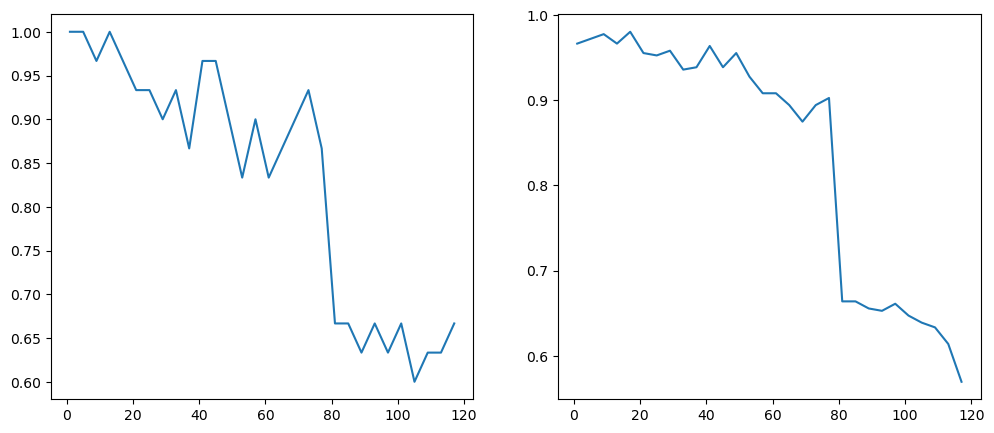

In [20]:
import matplotlib.pyplot as plt
ks = list(range(1,121,4))

scores = [mesure_precision(k) for k in ks]

# Problème : l'aléatoire introduit des mesures de précisions non "robuste"
# Une solution triviale : on répète les tirages et la mesure
scores_robust = []
nb_tirages = 12
for k in ks:
    scores_k = [mesure_precision(k) for _ in range(nb_tirages)]
    scores_robust.append(sum(scores_k)/nb_tirages)

fig, (ax1, ax2) =  plt.subplots(1,2,figsize=(12,5))
ax1.plot(ks, scores)
ax2.plot(ks, scores_robust)
plt.show()

### Utiliser votre algorithme des kNN pour effectuer des recommendations de films : pour un film donné, l'algorithme doit renvoyer les 5 films les plus "proches"

**Indications :**
- Charger les données, vérifier les manquants, éventuellement mettre les noms de film en index
- Transformer les variables catégoriques (que le Genre) en dummy variables
- Normaliser les variables avec une normalisation min-max pour qu'elles soient toutes entre 0 et 1 (*vous pouvez créer une fonction qui fait la normalisiation pour une colonne puis l'appliquer sur tout le df avec apply*)
- Enfin, faire votre knn avec une distance euclidienne et récupérer les 5 plus proches voisins

In [45]:
import pandas as pd
films = pd.read_csv('Movie-Ratings.csv')
# on renomme les colonnes
films.columns = ['Film', 'Genre', 'RT', 'Audience', 'Budget', 'Year']
# on vérifie les na
films.isna().sum()
# on met les films en index
films.set_index('Film', inplace=True)
films.head()

,Genre,RT,Audience,Budget,Year
Film,,,,,
(500) Days of Summer,Comedy,87,81,8,2009
"10,000 B.C.",Adventure,9,44,105,2008
12 Rounds,Action,30,52,20,2009
127 Hours,Adventure,93,84,18,2010
17 Again,Comedy,55,70,20,2009


In [46]:
# indicatrices pour le genre
films = pd.get_dummies(data=films, columns=["Genre", "Year"], dtype="int",
                      prefix="", prefix_sep="")
films.head()

,RT,Audience,Budget,Action,Adventure,Comedy,Drama,Horror,Romance,Thriller,2007,2008,2009,2010,2011
Film,,,,,,,,,,,,,,,
(500) Days of Summer,87,81,8,0,0,1,0,0,0,0,0,0,1,0,0
"10,000 B.C.",9,44,105,0,1,0,0,0,0,0,0,1,0,0,0
12 Rounds,30,52,20,1,0,0,0,0,0,0,0,0,1,0,0
127 Hours,93,84,18,0,1,0,0,0,0,0,0,0,0,1,0
17 Again,55,70,20,0,0,1,0,0,0,0,0,0,1,0,0


In [47]:
# normalisation min-max
def norm(col):
    return (col-min(col))/(max(col)-min(col))
films.apply(norm, axis=0)

,RT,Audience,Budget,Action,Adventure,Comedy,Drama,Horror,Romance,Thriller,2007,2008,2009,2010,2011
Film,,,,,,,,,,,,,,,
(500) Days of Summer,0.896907,0.843750,0.026667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"10,000 B.C.",0.092784,0.458333,0.350000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12 Rounds,0.309278,0.541667,0.066667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
127 Hours,0.958763,0.875000,0.060000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17 Again,0.567010,0.729167,0.066667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Your Highness,0.268041,0.375000,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Youth in Revolt,0.701031,0.541667,0.060000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Zodiac,0.917526,0.760417,0.216667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [49]:
# autre méthode de normalisation min-max
films_norm = (films-films.min())/(films.max()-films.min())
films_norm.head()

,RT,Audience,Budget,Action,Adventure,Comedy,Drama,Horror,Romance,Thriller,2007,2008,2009,2010,2011
Film,,,,,,,,,,,,,,,
(500) Days of Summer,0.896907,0.843750,0.026667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"10,000 B.C.",0.092784,0.458333,0.350000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12 Rounds,0.309278,0.541667,0.066667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
127 Hours,0.958763,0.875000,0.060000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17 Again,0.567010,0.729167,0.066667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
# le kNN pour récupérer les 5 films les plus proches
from math import sqrt

def distance_euclidienne(a,b):
    """Calcul de la distance euclidienne"""
    if len(a) == len(b):
        d = 0
        for i in range(len(a)):
            d += (a[i]-b[i])**2
        return sqrt(d)  
    else:
        print("Problème de dimensions")

def knn(nom_film, df=films_norm, k=5):
    """Algorithme des k-plus proches voisins"""
    # intiatlise la liste voisins
    voisins = []
    # parcours les données et ajout des couples (indice, distance)
    for film in df.index:
        d =  distance_euclidienne(df.loc[nom_film].values, df.loc[film].values)
        voisins.append((film,d))
    # tri de la liste voisins par distance croissante
    voisins.sort(key = lambda couple : couple[1])
    # renvoi des kPPV
    return voisins[1:k+1]

In [61]:
knn("Zodiac", df=films_norm.drop(['2007','2008','2009','2010','2011'], axis=1))
knn("127 Hours", df=films_norm.drop(['2007','2008','2009','2010','2011'], axis=1))

[('True Grit', 0.07638719266472546),
 ('Inglourious Basterds ', 0.18351576893322988),
 ('Stardust', 0.24737369470813145),
 ('The Road ', 0.27230601665040877),
 ('Harry Potter and the Deathly Hallows Part 1', 0.3860295231615827)]

### Maintenant que vous l'avez bien compris, implémenté, testé et validé, vous pouvez chercher les implémentations existantes de cet algorithme dans Python...

In [66]:
import pandas as pd
df = pd.read_csv('Iris.csv')
X = df.drop("Name", axis=1)
y = df.Name

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [71]:
from sklearn.neighbors import KNeighborsClassifier

# instanciation d'un objet model knn
knn = KNeighborsClassifier(n_neighbors=5, algorithm="brute")

# "entraînement"
knn.fit(X_train,y_train)

# prédictions
knn.predict(X_test)

# évaluation du modèle
knn.score(X_test, y_test)

0.9333333333333333